In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data_sales (1).csv")
df['Margin'] = (df['Operating Profit']/df['Total Sales'])*100
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Margin
0,Walmart,1128299.0,44364.0,Southeast,Florida,Orlando,Women's Apparel,103.0,218.0,2245.0,1257.0,Online,55.991091
1,West Gear,1128299.0,44393.0,South,Louisiana,New Orleans,Women's Apparel,103.0,163.0,1679.0,806.0,Online,48.004765
2,Sports Direct,1197831.0,44433.0,South,Alabama,Birmingham,Men's Street Footwear,10.0,700.0,7000.0,3150.0,Outlet,45.000000
3,Sports Direct,1197831.0,44435.0,South,Alabama,Birmingham,Women's Street Footwear,15.0,575.0,8625.0,3881.0,Outlet,44.997101
4,Sports Direct,1197831.0,44429.0,South,Alabama,Birmingham,Women's Street Footwear,15.0,475.0,7125.0,3206.0,Outlet,44.996491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,1185732.0,44518.0,Northeast,Maine,Portland,Men's Apparel,65.0,150.0,9750.0,2438.0,Outlet,25.005128
9637,Amazon,1185732.0,44491.0,West,Alaska,Anchorage,Women's Athletic Footwear,65.0,150.0,9750.0,2438.0,Outlet,25.005128
9638,Amazon,1185732.0,44491.0,West,Alaska,Anchorage,Men's Apparel,75.0,150.0,11250.0,2813.0,Outlet,25.004444
9639,West Gear,1185732.0,44296.0,Midwest,Indiana,Indianapolis,Men's Apparel,65.0,150.0,9750.0,2925.0,In-store,30.000000


In [3]:
summ = 0
for i in range(len(df)):
    if df.loc[i,'Product'] == "Women's Apparel":
        summ += df.loc[i,'Units Sold']
        
summ

433127.0

In [4]:
df1 = df.groupby(['Product']).agg({'Units Sold': 'sum','Total Sales': 'sum', 'Margin': 'mean'}).reset_index()
df1


,Product,Units Sold,Total Sales,Margin
0,Men's Apparel,306133.0,12337155.0,41.308214
1,Men's Athletic Footwear,434451.0,15322410.0,40.274960
2,Men's Street Footwear,593320.0,20882669.0,44.612191
3,Women's Apparel,433127.0,17847910.0,44.148036
4,Women's Athletic Footwear,317136.0,10659235.0,42.423729
5,Women's Street Footwear,391444.0,12770688.0,41.028708


Text(0.5, 1.0, 'Units Sold by Product Name')

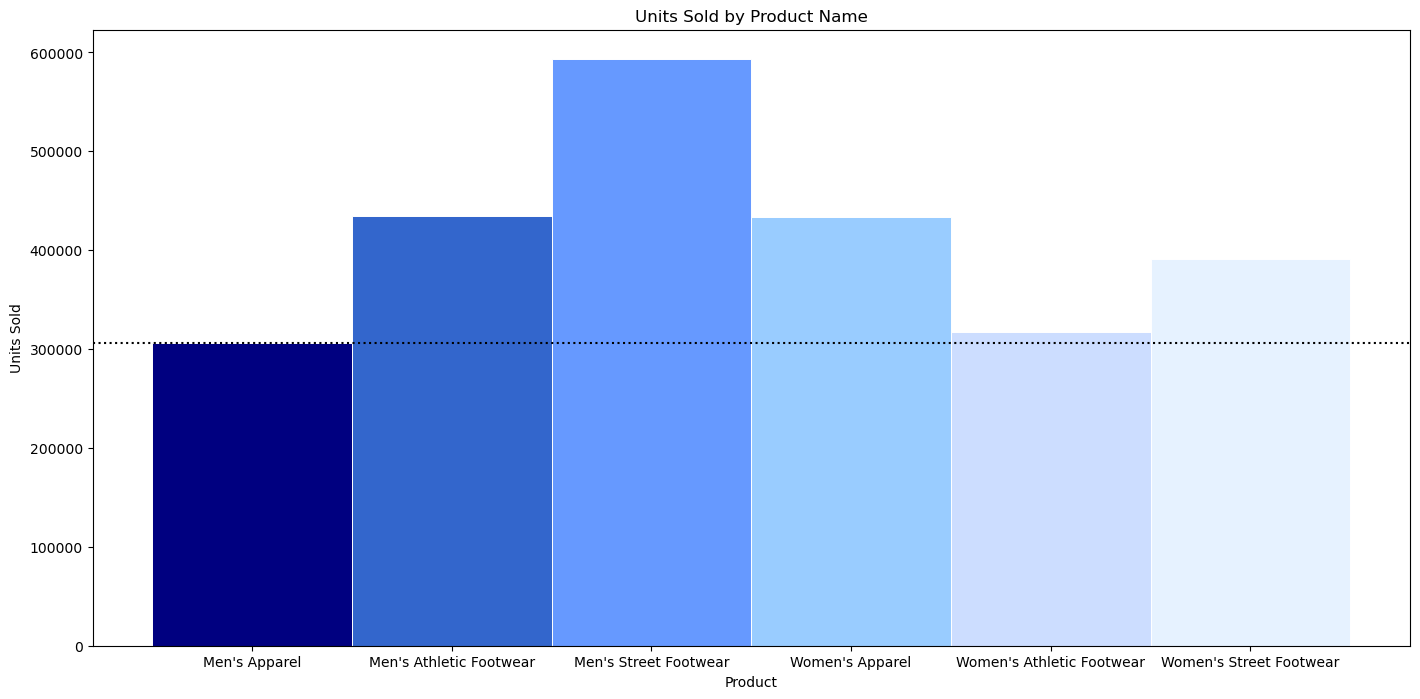

In [5]:
plt.figure(figsize=(17,8))
color = [
    "navy",  # Highest value (Dark Blue)
    "#3366CC",  # Medium-Dark Blue
    "#6699FF",  # Medium Blue
    "#99CCFF",  # Light Blue
    "#CCDDFF",  # Very Light Blue
    "#E6F2FF"   # Lowest value (Pale Blue)
]
plt.bar(df1['Product'],df1['Units Sold'], width=1, edgecolor="white", linewidth=0.7,color=color)
min_units_sold = df1['Units Sold'].min()
plt.axhline(y=min_units_sold, color='black', linestyle='dotted')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.title('Units Sold by Product Name')


Text(0.5, 1.0, 'Total Sales by Product Name')

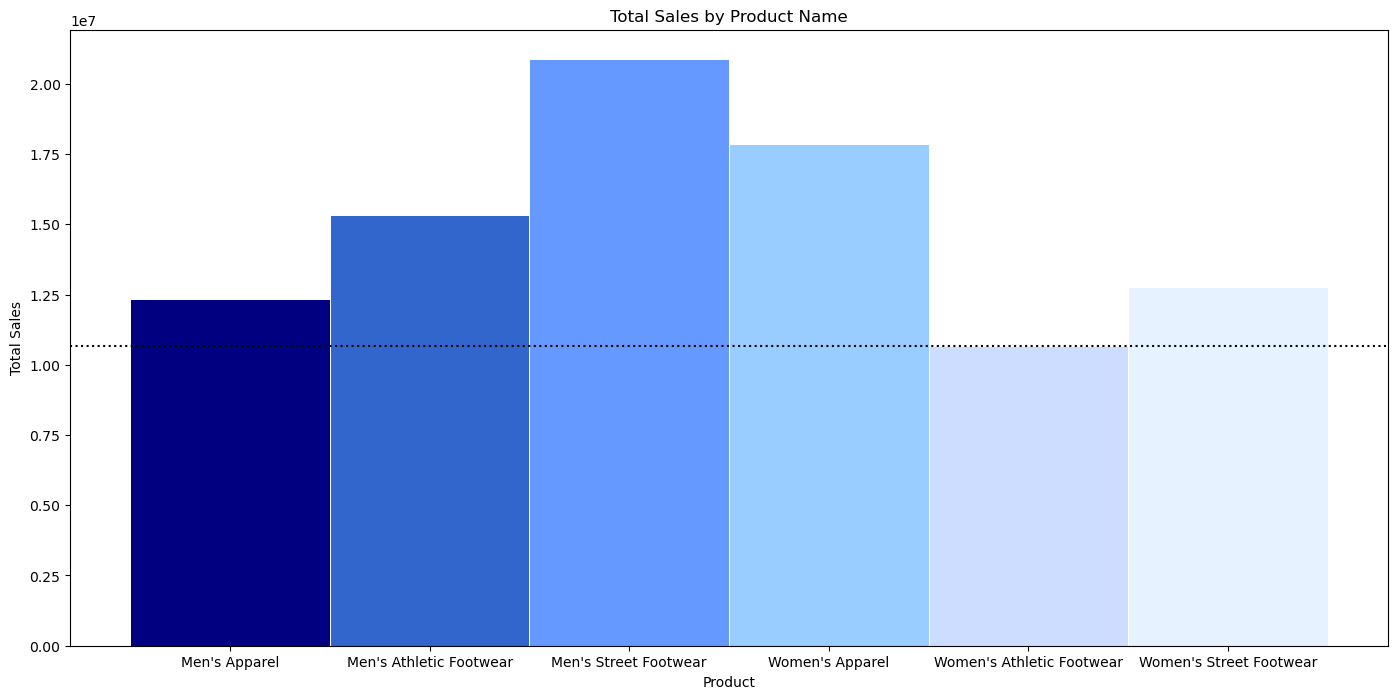

In [6]:
plt.figure(figsize=(17,8))
color = [
    "navy",  # Highest value (Dark Blue)
    "#3366CC",  # Medium-Dark Blue
    "#6699FF",  # Medium Blue
    "#99CCFF",  # Light Blue
    "#CCDDFF",  # Very Light Blue
    "#E6F2FF"   # Lowest value (Pale Blue)
]
plt.bar(df1['Product'],df1['Total Sales'], width=1, edgecolor="white", linewidth=0.7 ,color = color)
min_units_sold = df1['Total Sales'].min()
plt.axhline(y=min_units_sold, color='black', linestyle='dotted')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Name')

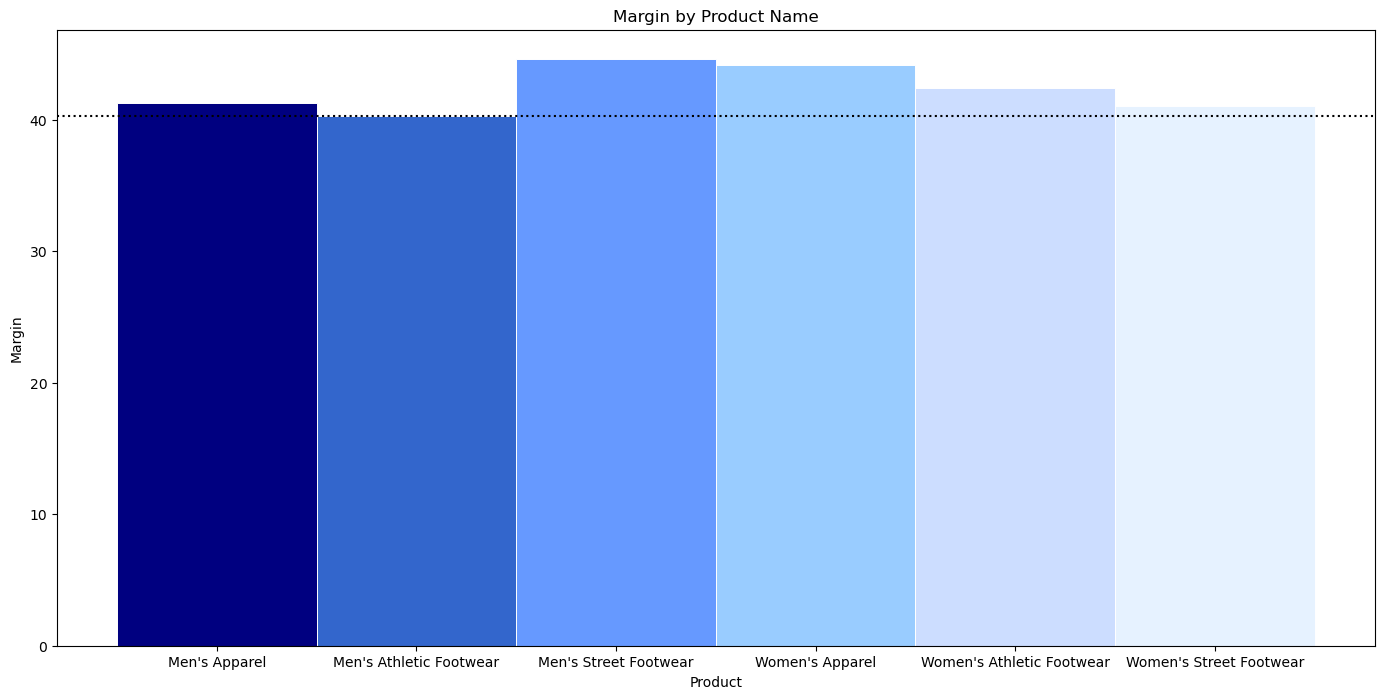

In [7]:
plt.figure(figsize=(17,8))
color = [
    "navy",  # Highest value (Dark Blue)
    "#3366CC",  # Medium-Dark Blue
    "#6699FF",  # Medium Blue
    "#99CCFF",  # Light Blue
    "#CCDDFF",  # Very Light Blue
    "#E6F2FF"   # Lowest value (Pale Blue)
]
plt.bar(df1['Product'],df1['Margin'], width=1, edgecolor="white", linewidth=0.7,color=color)
min_units_sold = df1['Margin'].min()
plt.axhline(y=min_units_sold, color='black', linestyle='dotted')
plt.xlabel('Product')
plt.ylabel('Margin')
plt.title('Margin by Product Name')
plt.show()

In [8]:
df2 = df.groupby(['City']).agg({'Units Sold': 'sum','Total Sales': 'sum', 'Margin': 'mean'})
df2.sort_values('Total Sales',inplace=True,ascending=False)
df2.reset_index(inplace=True)
df2

,City,Units Sold,Total Sales,Margin
0,Charleston,102483.0,3997485.0,44.495865
1,New York,111954.0,3980134.0,39.638542
2,San Francisco,85650.0,3362174.0,35.775035
3,Miami,73135.0,3160090.0,42.926411
4,Portland,72946.0,3054564.0,40.777530
5,Orlando,60295.0,2768290.0,36.424007
6,Seattle,46611.0,2633075.0,32.506873
7,Los Angeles,76384.0,2563500.0,41.596017
8,Houston,88772.0,2487067.0,43.667345
9,Albany,57186.0,2442784.0,42.621821


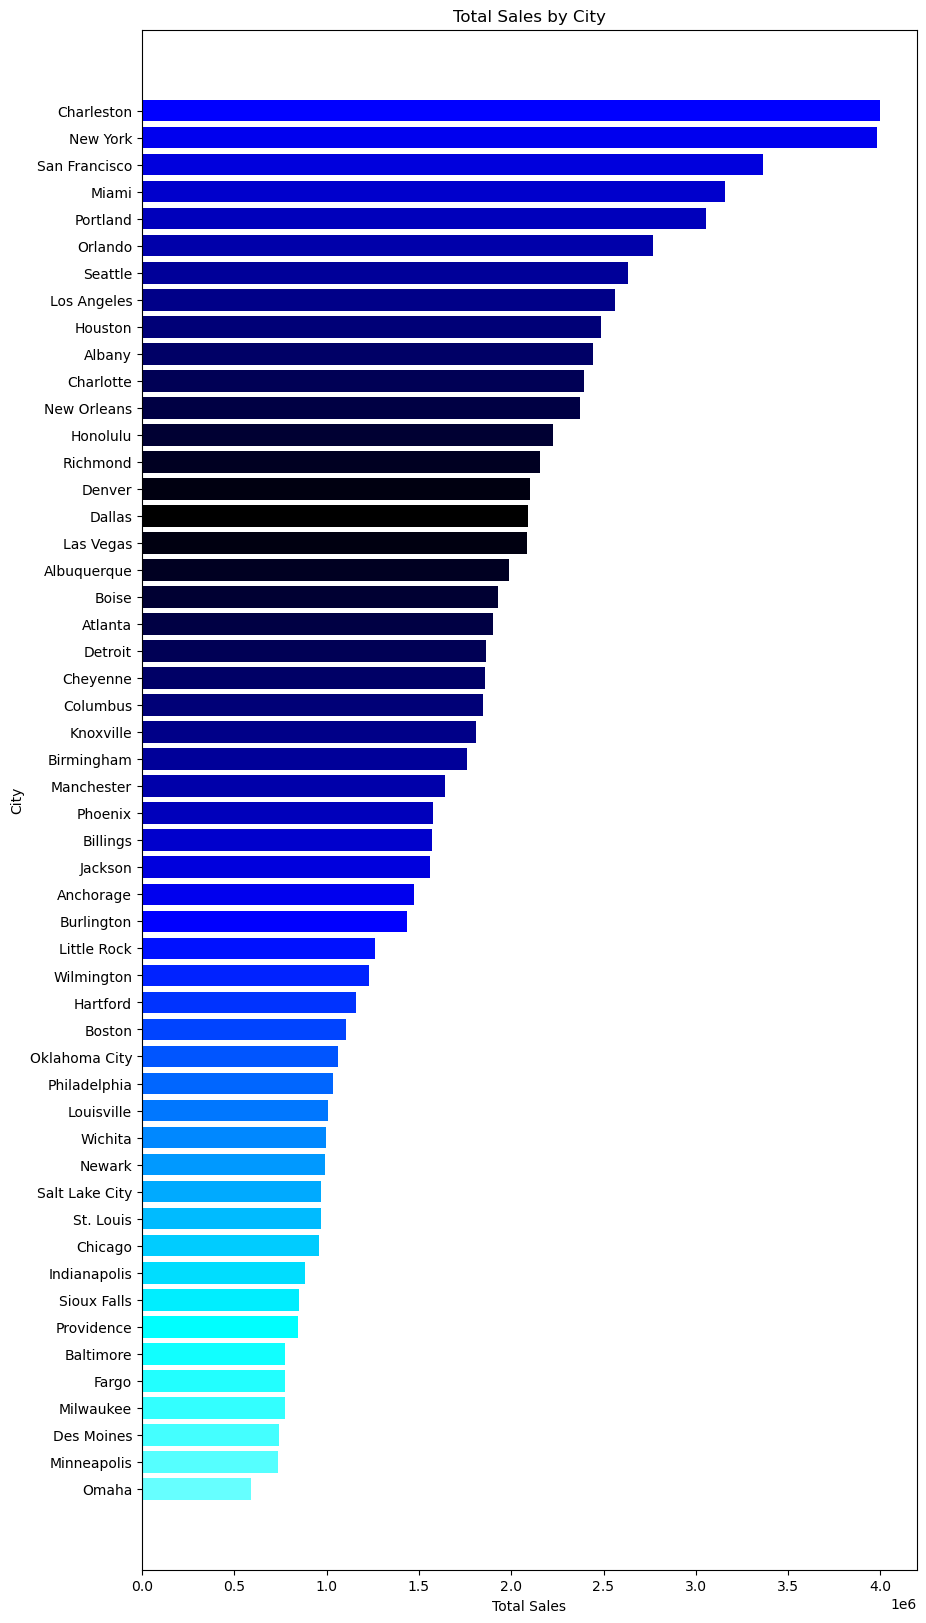

In [9]:
plt.figure(figsize=(10, 20))
color = [
    "#0000FF", "#0000EE", "#0000DD", "#0000CC", "#0000BB", "#0000AA", "#000099", "#000088", "#000077", "#000066",
    "#000055", "#000044", "#000033", "#000022", "#000011", "#000000", "#000011", "#000022", "#000033", "#000044",
    "#000055", "#000066", "#000077", "#000088", "#000099", "#0000AA", "#0000BB", "#0000CC", "#0000DD", "#0000EE",
    "#0000FF", "#0011FF", "#0022FF", "#0033FF", "#0044FF", "#0055FF", "#0066FF", "#0077FF", "#0088FF", "#0099FF",
    "#00AAFF", "#00BBFF", "#00CCFF", "#00DDFF", "#00EEFF", "#00FFFF", "#11FFFF", "#22FFFF", "#33FFFF", "#44FFFF",
    "#55FFFF", "#66FFFF", "#77FFFF"
]




plt.barh(df2['City'], df2['Total Sales'], color= color)

plt.xlabel('Total Sales')
plt.ylabel('City')
plt.title('Total Sales by City')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest sales at the top
plt.show()

In [10]:
df3 = df.groupby(['State']).agg({'Units Sold': 'sum','Total Sales': 'sum', 'Margin': 'mean'})
df3.sort_values('Total Sales',inplace=True,ascending=False)
df3.reset_index(inplace=True)
df3

,State,Units Sold,Total Sales,Margin
0,New York,169140.0,6422918.0,40.831854
1,Florida,133430.0,5928380.0,39.024969
2,California,162034.0,5925674.0,38.699063
3,Texas,157950.0,4577359.0,44.962625
4,South Carolina,72610.0,2928565.0,43.303545
5,Washington,46611.0,2633075.0,32.506873
6,North Carolina,62936.0,2395657.0,46.349711
7,Louisiana,57615.0,2375082.0,44.680761
8,Hawaii,40375.0,2228245.0,31.963547
9,Virginia,52969.0,2157510.0,41.438604


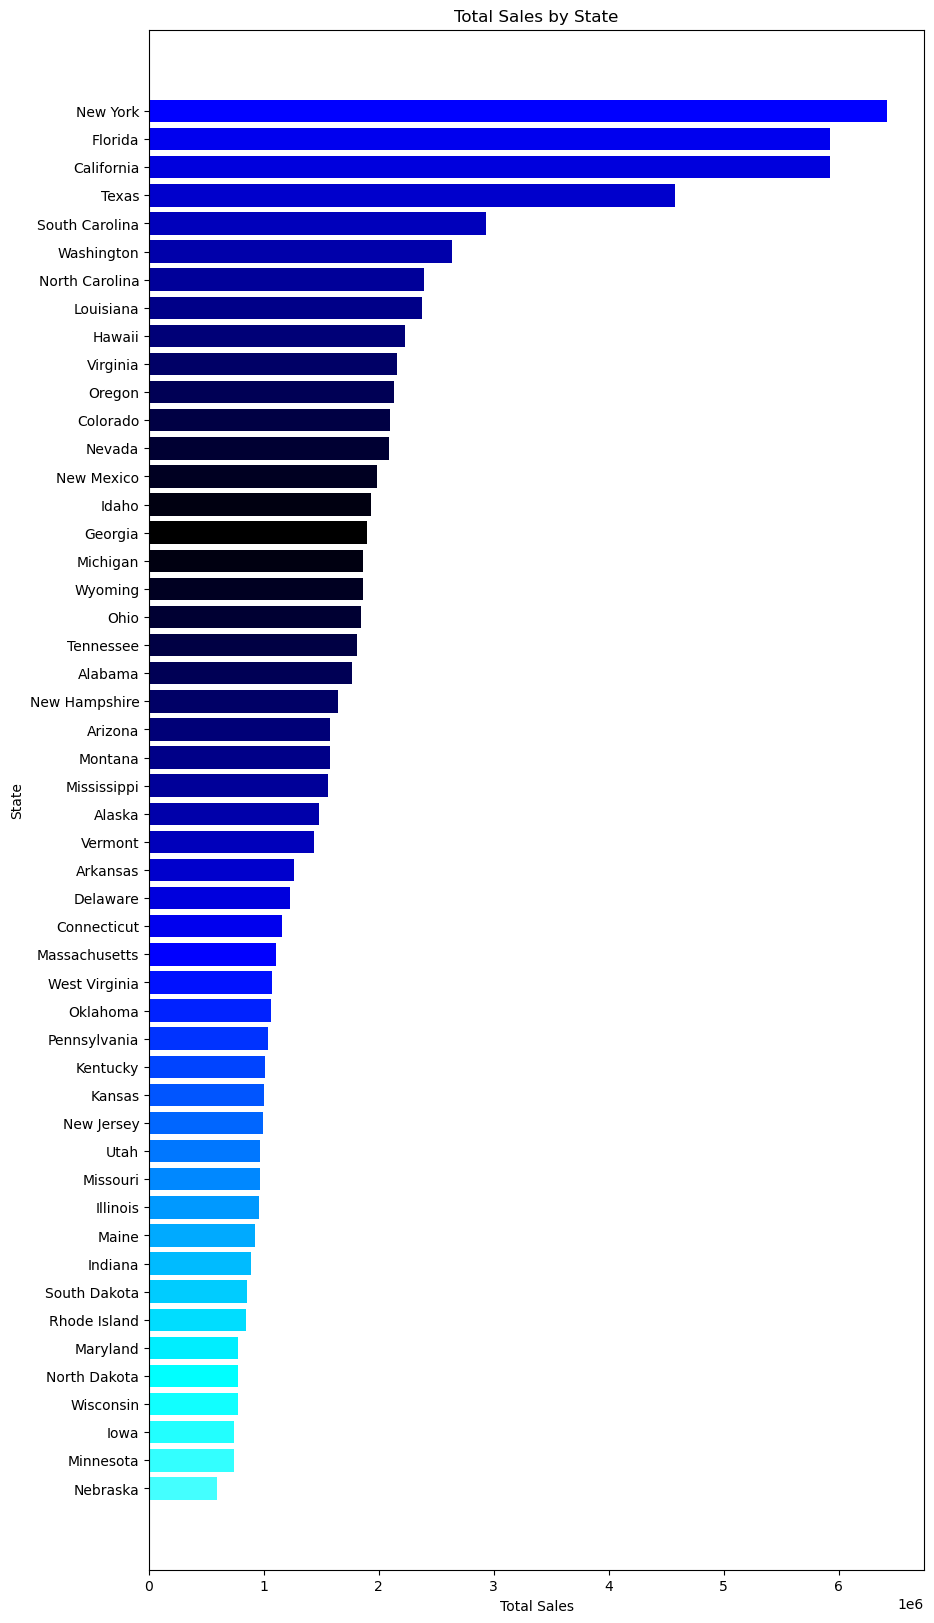

In [11]:
plt.figure(figsize=(10, 20))
color = [
    "#0000FF", "#0000EE", "#0000DD", "#0000CC", "#0000BB", "#0000AA", "#000099", "#000088", "#000077", "#000066",
    "#000055", "#000044", "#000033", "#000022", "#000011", "#000000", "#000011", "#000022", "#000033", "#000044",
    "#000055", "#000066", "#000077", "#000088", "#000099", "#0000AA", "#0000BB", "#0000CC", "#0000DD", "#0000EE",
    "#0000FF", "#0011FF", "#0022FF", "#0033FF", "#0044FF", "#0055FF", "#0066FF", "#0077FF", "#0088FF", "#0099FF",
    "#00AAFF", "#00BBFF", "#00CCFF", "#00DDFF", "#00EEFF", "#00FFFF", "#11FFFF", "#22FFFF", "#33FFFF", "#44FFFF",
    "#55FFFF"
]

plt.barh(df3['State'], df3['Total Sales'], color= color)
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.title('Total Sales by State')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest sales at the top
plt.show()

In [12]:
len(df['City'].unique())

52

In [13]:
len(df['State'].unique())

50

In [14]:
df4 = df.groupby(['Sales Method']).agg({'Units Sold': 'sum','Total Sales': 'sum', 'Margin': 'mean'})
df4.sort_values('Total Sales',inplace=True,ascending=False)
df4.reset_index(inplace=True)
df4

,Sales Method,Units Sold,Total Sales,Margin
0,In-store,689990.0,35664375.0,35.612795
1,Outlet,846528.0,29388253.0,39.493942
2,Online,939093.0,24767439.0,46.409415


Text(0.5, 1.0, 'Total Sales by Sales Method')

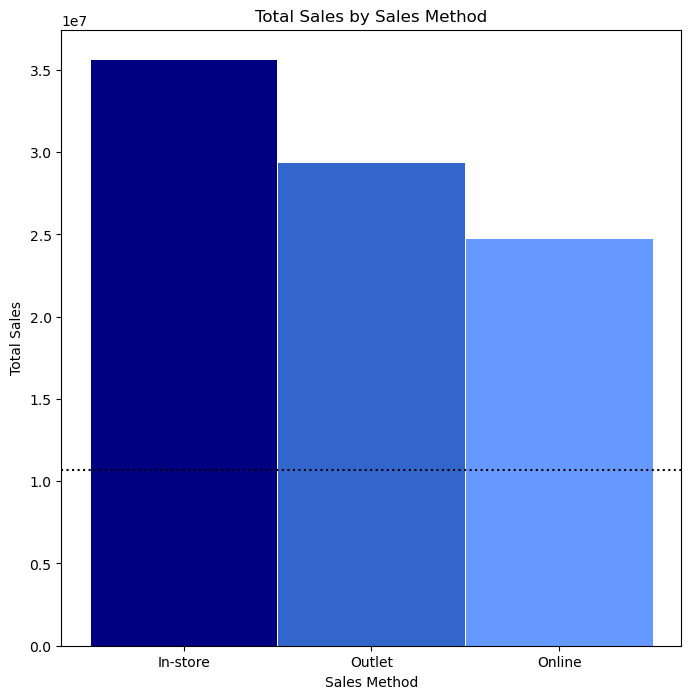

In [15]:
plt.figure(figsize=(8,8))
color = [
    "navy",  # Highest value (Dark Blue)
    "#3366CC",  # Medium-Dark Blue
    "#6699FF",  # Medium Blue
    "#99CCFF",  # Light Blue

]
plt.bar(df4['Sales Method'],df4['Total Sales'], width=1, edgecolor="white", linewidth=0.7 ,color = color)
min_units_sold = df1['Total Sales'].min()
plt.axhline(y=min_units_sold, color='black', linestyle='dotted')
plt.xlabel('Sales Method')
plt.ylabel('Total Sales')
plt.title('Total Sales by Sales Method')

In [16]:
df5 = df.groupby(['Retailer']).agg({'Units Sold': 'sum','Total Sales': 'sum', 'Margin': 'mean'})
df5.sort_values('Total Sales',inplace=True,ascending=False)
df5.reset_index(inplace=True)
df5

,Retailer,Units Sold,Total Sales,Margin
0,West Gear,624012.0,24204740.0,41.788808
1,Foot Locker,603919.0,21989528.0,41.790008
2,Sports Direct,556090.0,18188531.0,44.496849
3,Kohl's,287375.0,10211506.0,41.924145
4,Amazon,197990.0,7769912.0,41.787010
5,Walmart,206225.0,7455850.0,40.652906


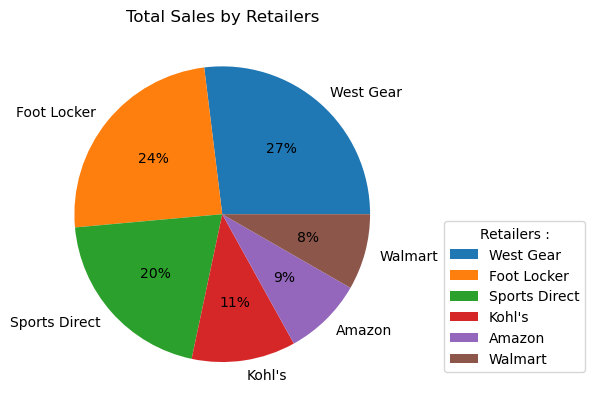

In [17]:
plt.pie(df5['Total Sales'],labels=df5['Retailer'],autopct='%1.0f%%')
plt.title('Total Sales by Retailers')
plt.legend(title = "Retailers :",loc='best', bbox_to_anchor=(0.5, 0, 1, 0.5))
plt.show() 